In [1]:
import os
from pybedtools import BedTool
import pandas as pd
import seaborn as sns
from pathlib import Path
outdir = Path('/home/hsher/scratch/circ_de/output/compare_to_rz')


In [2]:
de_outputs = list(outdir.glob('*.tsv'))
print(de_outputs)

[PosixPath('/home/hsher/scratch/circ_de/output/compare_to_rz/HEK_rar.gtf.tsv'), PosixPath('/home/hsher/scratch/circ_de/output/compare_to_rz/circseq-bm-rar11-nxt.gtf.tsv'), PosixPath('/home/hsher/scratch/circ_de/output/compare_to_rz/EV_rar11.gtf.tsv'), PosixPath('/home/hsher/scratch/circ_de/output/compare_to_rz/circseq-bm-rar19-nxt.gtf.tsv'), PosixPath('/home/hsher/scratch/circ_de/output/compare_to_rz/circseq-bm-rar.gtf.tsv'), PosixPath('/home/hsher/scratch/circ_de/output/compare_to_rz/TOB2_rar11.gtf.tsv'), PosixPath('/home/hsher/scratch/circ_de/output/compare_to_rz/HEK_rar11.gtf.tsv'), PosixPath('/home/hsher/scratch/circ_de/output/compare_to_rz/circseq-bm-arr.gtf.tsv')]


```
column 	name 	description
1 	circRNA_ID 	circRNA identifier
2 	Case_BSJ 	number of BSJ reads in case
3 	Case_FSJ 	number of FSJ reads in case
4 	Case_Ratio 	junction ratio in case
5 	Ctrl_BSJ 	number of BSJ reads in control
6 	Ctrl_FSJ 	number of FSJ reads in control
7 	Ctrl_Ratio 	junction ratio in control
8 	DE_score 	differential expression score
9 	DS_score 	differential splicing score
```

In [3]:
rename_dict = {'HEK_JC_rar11':'rar11_JC_rep2', 
               'Exo05': 'Exo05', 
               'Exo10': 'Exo10',
               'HEK_rar11': 'rar11_rep2', 
               'EV_rar11': 'rar11_rep2-EV', 
               'TOB2_rar11': 'rar11_rep2-TOB2',
               'EV_rz': 'rz-EV', 
               'HEK_rar': 'rar_rep2', 
               'TOB2_rz': 'rz-TOB2', 
               'HEK_JC_rar': 'rar_JC', 
               'RBM15_rz': 'rz-RBM15',
               'circseq-bm-rar19-nxt': 'rar19', 
               'circseq-bm-rar11-nxt': 'rar11_rep1', 
               'circseq-bm-rar': 'rar_rep1',
               'circseq-bm-arr': 'arr', 
               'circseq-bm-rz': 'rz_rep1', 
               'APO-50-A': 'polyA-APO-50', 
               'APO-50-R': 'RNase-APO-50', 
               'HuR-noD-A': 'polyA-HuR-0',
               'HuR-50-R': 'RNase-HuR-0', 
               'HuR-1-A': 'polyA-HuR-1000', 
               'APO-noD-R': 'RNase-APO-0', 
               'HuR-1-R': 'RNase-HuR-1000', 
               'APO-1-R': 'RNase-APO-1000',
               'APO-noD-A': 'polyA-APO-0'}

In [4]:
group_color = {'rar11_JC': 'tomato',
              'rar11_rep1': 'orange',
               'rar11_rep2': 'orange',
              
              'rz': 'mediumorchid', 
               'rar_rep1': 'seagreen',
              'rar_rep2': 'seagreen',
              'rar_JC': 'limegreen',
              'arr': 'royalblue'}

In [5]:
de_outputs = [Path('/home/hsher/scratch/circ_de/output/compare_to_rz/HEK_rar.gtf.tsv'),
              Path('/home/hsher/scratch/circ_de/output/compare_to_rz/circseq-bm-rar.gtf.tsv'),
 Path('/home/hsher/scratch/circ_de/output/compare_to_rz/circseq-bm-rar11-nxt.gtf.tsv'),
              Path('/home/hsher/scratch/circ_de/output/compare_to_rz/HEK_rar11.gtf.tsv'),
 Path('/home/hsher/scratch/circ_de/output/compare_to_rz/circseq-bm-arr.gtf.tsv')]

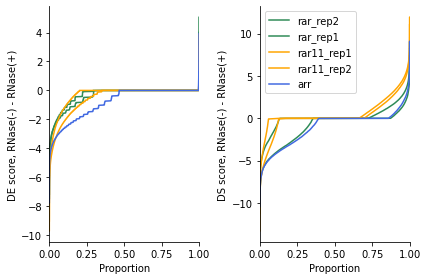

In [6]:
import matplotlib.pyplot as plt
# control = RNase+
# case = RNnase-
f, ax = plt.subplots(1,2, sharex = True, figsize = (6,4))


for i,f in enumerate(de_outputs):
    de_df = pd.read_csv(f, sep = '\t')
    name = rename_dict[f.name.split('.gtf')[0]]
    color = group_color[name]
    
    sns.ecdfplot(de_df, y = 'DE_score', color = color, ax = ax[0], label = name)
    sns.ecdfplot(de_df, y = 'DS_score', color = color, ax = ax[1], label = name)
    
ax[0].set_ylabel('DE score, RNase(-) - RNase(+)')
ax[1].set_ylabel('DS score, RNase(-) - RNase(+)')

plt.legend()
sns.despine()
plt.tight_layout()

In [14]:
de_df.loc[de_df['DE_score']<0, 'Ctrl_BSJ'].median()

10.0

In [16]:
de_df.loc[(de_df['DE_score']==0)&((de_df['Ctrl_BSJ']>0))].median()

Case_BSJ       0.000
Case_FSJ       0.000
Case_Ratio     0.000
Ctrl_BSJ       2.000
Ctrl_FSJ      36.000
Ctrl_Ratio     0.095
DE_score       0.000
DS_score       0.000
dtype: float64

In [13]:
de_df.loc[de_df['DE_score']==0]

,circRNA_ID,Case_BSJ,Case_FSJ,Case_Ratio,Ctrl_BSJ,Ctrl_FSJ,Ctrl_Ratio,DE_score,DS_score
0,chr2:38802715|38843164,0,0,0.000,2,12,0.250,0.0,0.000000
1,chr1:193203795|193249871,1,391,0.005,0,0,0.000,0.0,-4.292872
2,chr12:96017044|96019240,2,900,0.004,0,0,0.000,0.0,-4.519501
4,chr12:411747|438554,0,0,0.000,2,13,0.235,0.0,0.000000
5,chr3:33068230|33068970,6,288,0.040,0,0,0.000,0.0,-1.276858
...,...,...,...,...,...,...,...,...,...
29447,chr14:66965191|67058786,2,277,0.014,0,0,0.000,0.0,-2.793432
29448,chr3:185598412|185613408,4,219,0.035,0,0,0.000,0.0,-1.496059
29450,chr13:77719517|77746855,0,0,0.000,3,0,1.000,0.0,0.000000
29454,chr17:8253859|8258199,0,0,0.000,1,442,0.005,0.0,4.440309
